**Chapter 2 – End-to-end Machine Learning project**

*Welcome to Machine Learning Housing Corp.! Your task is to predict median house values in Californian districts, given a number of features from these districts.*

*This notebook contains all the sample code and solutions to the exercices in chapter 2.*

**Note**: You may find little differences between the code outputs in the book and in these Jupyter notebooks: these slight differences are mostly due to the random nature of many training algorithms: although I have tried to make these notebooks' outputs as constant as possible, it is impossible to guarantee that they will produce the exact same output on every platform. Also, some data structures (such as dictionaries) do not preserve the item order. Finally, I fixed a few minor bugs (I added notes next to the concerned cells) which lead to slightly different results, without changing the ideas presented in the book.

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
#from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Get the data

In [2]:
import os
#import tarfile
#from six.moves import urllib

#DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
#HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
#     if not os.path.isdir(housing_path):
#         os.makedirs(housing_path)
#     tgz_path = os.path.join(housing_path, "housing.tgz")
#     urllib.request.urlretrieve(housing_url, tgz_path)
#     housing_tgz = tarfile.open(tgz_path)
#     housing_tgz.extractall(path=housing_path)
#     housing_tgz.close()

In [3]:
#fetch_housing_data()

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


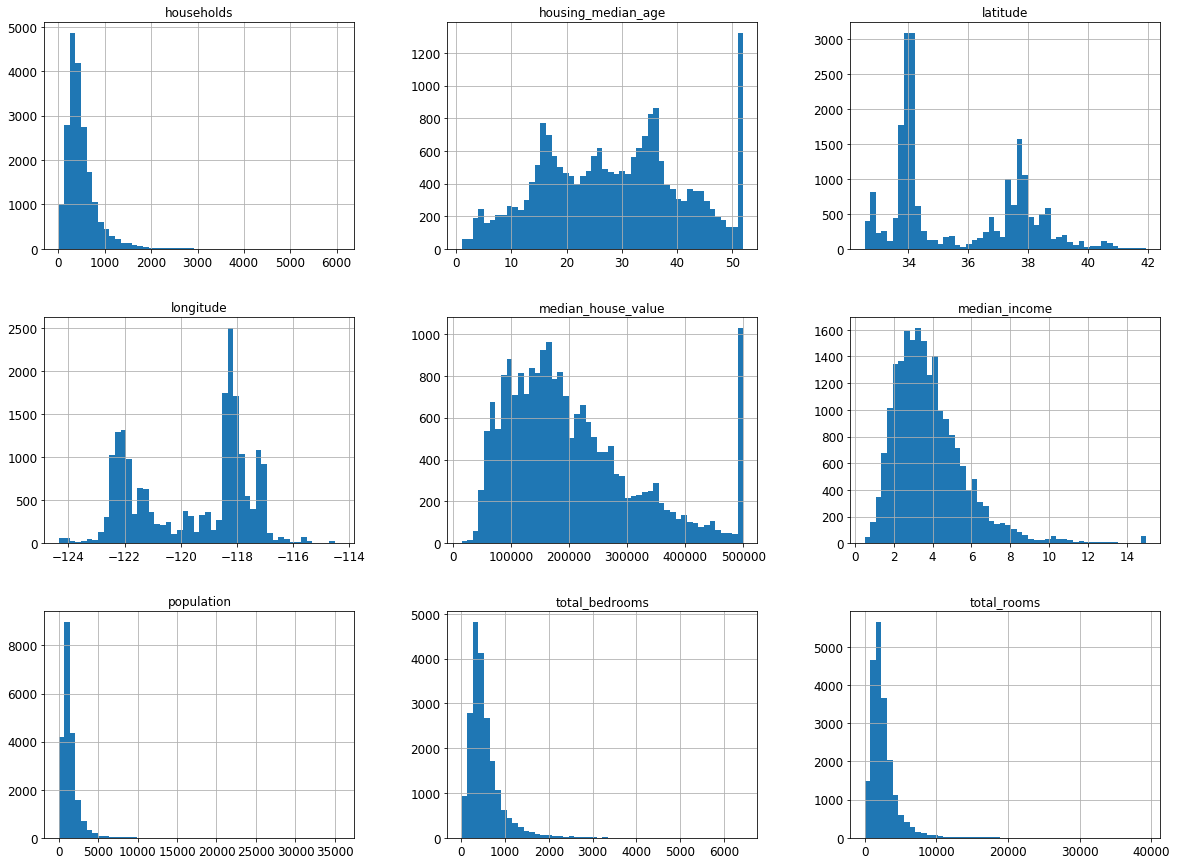

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

In [10]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [11]:
# import numpy as np

# # For illustration only. Sklearn has train_test_split()
# def split_train_test(data, test_ratio):
#     shuffled_indices = np.random.permutation(len(data))
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled_indices[:test_set_size]
#     train_indices = shuffled_indices[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
# train_set, test_set = split_train_test(housing, 0.2)
# print(len(train_set), "train +", len(test_set), "test")

In [13]:
# test_set

In [14]:
# #from zlib import crc32

# def test_set_check(identifier, test_ratio):
#     return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

# def split_train_test_by_id(data, test_ratio, id_column):
#     ids = data[id_column]
#     in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
#     return data.loc[~in_test_set], data.loc[in_test_set]

The implementation of `test_set_check()` above works fine in both Python 2 and Python 3. In earlier releases, the following implementation was proposed, which supported any hash function, but was much slower and did not support Python 2:

In [15]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

If you want an implementation that supports any hash function and is compatible with both Python 2 and Python 3, here is one:

In [16]:
# def test_set_check(identifier, test_ratio, hash=hashlib.md5):
#     return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [17]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [18]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [19]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


In [20]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [21]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


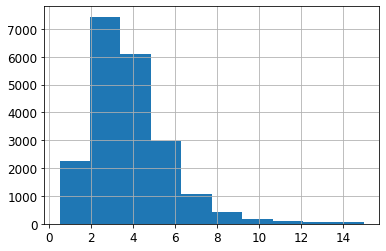

In [22]:
housing["median_income"].hist()

**Warning**: in the book, I did not use `pd.cut()`, instead I used the code below. The `pd.cut()` solution gives the same result (except the labels are integers instead of floats), but it is simpler to understand:

```python
# Divide by 1.5 to limit the number of income categories
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# Label those above 5 as 5
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
```

In [23]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 2,2.7, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

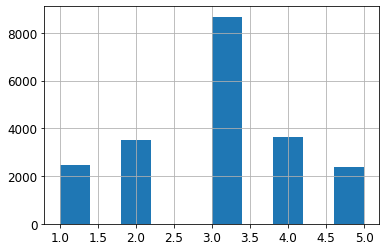

In [24]:

housing["income_cat"].hist()

In [25]:
housing["income_cat"].value_counts()

3    8672
4    3639
2    3510
1    2457
5    2362
Name: income_cat, dtype: int64

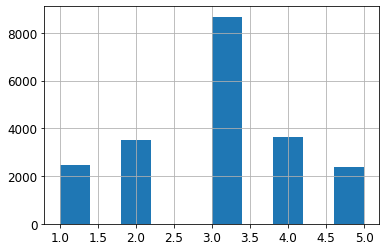

In [26]:
housing["income_cat"].hist()

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [28]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.420058
4    0.176357
2    0.170058
1    0.119186
5    0.114341
Name: income_cat, dtype: float64

In [29]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3    0.420179
4    0.176296
2    0.170058
1    0.119004
5    0.114462
Name: income_cat, dtype: float64

In [30]:
housing["income_cat"].value_counts() / len(housing)

3    0.420155
4    0.176308
2    0.170058
1    0.119041
5    0.114438
Name: income_cat, dtype: float64

In [31]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [32]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.119041,0.119186,0.120882,1.546602,0.122100
2,0.170058,0.170058,0.167878,-1.282051,0.000000
3,0.420155,0.420058,0.434351,3.378690,-0.023063
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [33]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Discover and visualize the data to gain insights

In [34]:
housing = strat_train_set.copy()

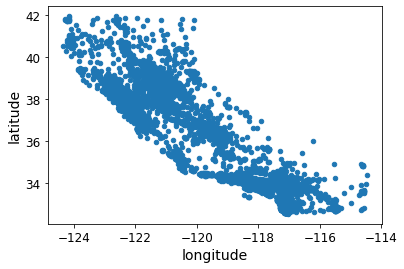

In [35]:
housing.plot(kind="scatter", x="longitude", y="latitude")
#save_fig("bad_visualization_plot")

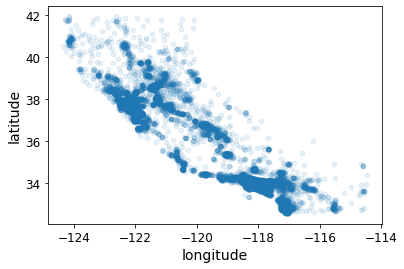

In [36]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
#save_fig("better_visualization_plot")

The argument `sharex=False` fixes a display bug (the x-axis values and legend were not displayed). This is a temporary fix (see: https://github.com/pandas-dev/pandas/issues/10611). Thanks to Wilmer Arellano for pointing it out.

Saving figure housing_prices_scatterplot


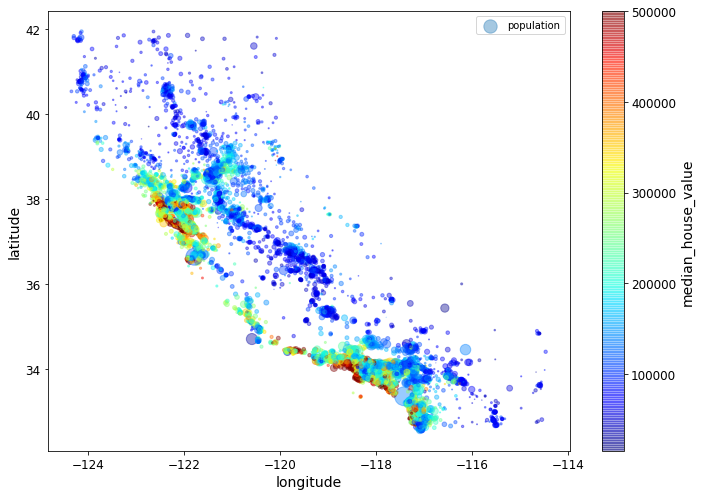

In [37]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

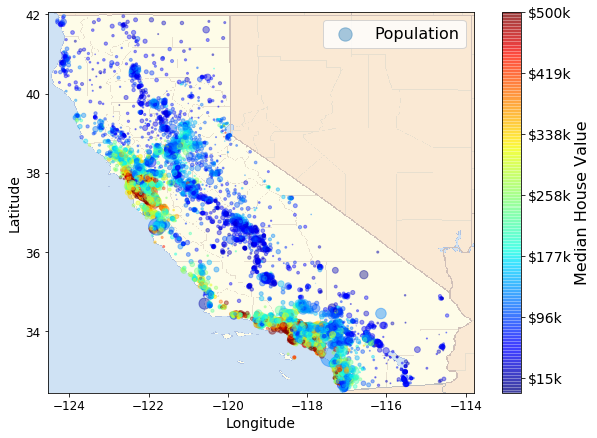

In [38]:
import matplotlib.image as mpimg
california_img=mpimg.imread(PROJECT_ROOT_DIR + '/images/end_to_end_project/california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 7)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
#save_fig("california_housing_prices_plot")
plt.show()

In [39]:
corr_matrix = housing.corr()

In [40]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.689067
total_rooms           0.130254
housing_median_age    0.113178
households            0.062495
total_bedrooms        0.045496
population           -0.029381
longitude            -0.046961
latitude             -0.141730
Name: median_house_value, dtype: float64

Saving figure scatter_matrix_plot


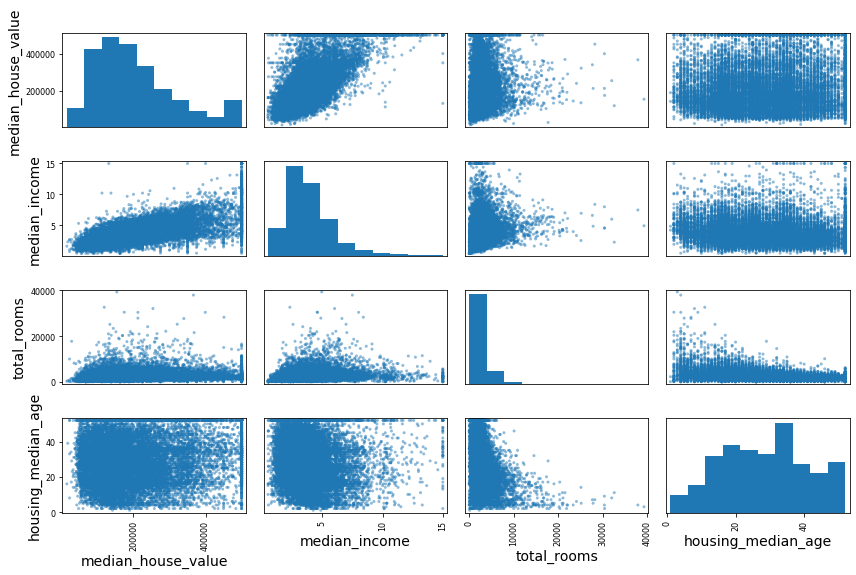

In [41]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Saving figure income_vs_house_value_scatterplot


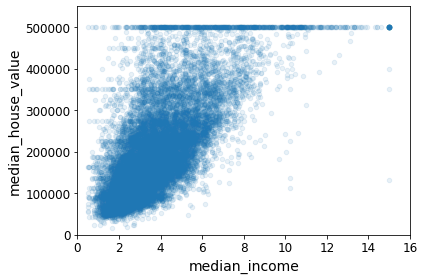

In [42]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

In [43]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

Note: there was a bug in the previous cell, in the definition of the `rooms_per_household` attribute. This explains why the correlation value below differs slightly from the value in the book (unless you are reading the latest version).

In [44]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.689067
rooms_per_household         0.143254
total_rooms                 0.130254
housing_median_age          0.113178
households                  0.062495
total_bedrooms              0.045496
population_per_household   -0.022335
population                 -0.029381
longitude                  -0.046961
latitude                   -0.141730
bedrooms_per_room          -0.256251
Name: median_house_value, dtype: float64

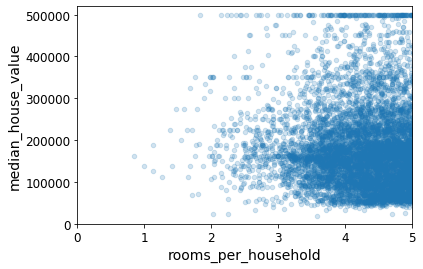

In [45]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [46]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16347.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16347.000000,16512.000000
mean,-119.581682,35.640015,28.669755,2638.043181,538.498807,1428.206395,499.922844,3.872159,207107.986797,5.437939,0.213105,3.098686
std,2.007740,2.137568,12.596952,2197.298058,422.908980,1149.847480,383.236300,1.910454,115579.215819,2.612858,0.058210,11.590824
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.820000,33.940000,18.000000,1447.750000,296.000000,789.000000,281.000000,2.559100,120100.000000,4.436705,0.175450,2.430190
50%,-118.510000,34.260000,29.000000,2128.000000,435.000000,1171.000000,410.000000,3.531750,179800.000000,5.228256,0.203015,2.816946
75%,-118.020000,37.720000,37.000000,3144.000000,646.000000,1725.000000,605.000000,4.750000,264700.000000,6.056361,0.240271,3.282433
max,-114.470000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# Prepare the data for Machine Learning algorithms

In [47]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [48]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
19060,-122.41,38.16,37.0,1549.0,NaN,863.0,275.0,2.7457,NEAR BAY
17840,-121.89,37.44,8.0,2534.0,NaN,1527.0,364.0,7.8532,<1H OCEAN
12101,-117.34,33.94,13.0,7910.0,NaN,3382.0,1176.0,5.5563,INLAND
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
7806,-118.09,33.89,42.0,991.0,NaN,717.0,219.0,4.0926,<1H OCEAN


In [49]:
housing.isnull().any(axis=0)

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
ocean_proximity       False
dtype: bool

In [50]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [51]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
19060,-122.41,38.16,37.0,1549.0,863.0,275.0,2.7457,NEAR BAY
17840,-121.89,37.44,8.0,2534.0,1527.0,364.0,7.8532,<1H OCEAN
12101,-117.34,33.94,13.0,7910.0,3382.0,1176.0,5.5563,INLAND
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
7806,-118.09,33.89,42.0,991.0,717.0,219.0,4.0926,<1H OCEAN


In [52]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
19060,-122.41,38.16,37.0,1549.0,435.0,863.0,275.0,2.7457,NEAR BAY
17840,-121.89,37.44,8.0,2534.0,435.0,1527.0,364.0,7.8532,<1H OCEAN
12101,-117.34,33.94,13.0,7910.0,435.0,3382.0,1176.0,5.5563,INLAND
17923,-121.97,37.35,30.0,1955.0,435.0,999.0,386.0,4.6328,<1H OCEAN
7806,-118.09,33.89,42.0,991.0,435.0,717.0,219.0,4.0926,<1H OCEAN


**Warning**: Since Scikit-Learn 0.20, the `sklearn.preprocessing.Imputer` class was replaced by the `sklearn.impute.SimpleImputer` class.

In [53]:
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="median")

Remove the text attribute because median can only be calculated on numerical attributes:

In [54]:
housing_num = housing.drop('ocean_proximity', axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

In [55]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

Check that this is the same as manually computing the median of each attribute:

In [56]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2128.     ,  435.     ,
       1171.     ,  410.     ,    3.53175])

Transform the training set:

In [57]:
X = imputer.transform(housing_num)

In [58]:
X

array([[-1.17770e+02,  3.36900e+01,  1.60000e+01, ...,  4.79000e+02,
         3.36000e+02,  2.14060e+00],
       [-1.17780e+02,  3.38600e+01,  1.60000e+01, ...,  2.14600e+03,
         6.33000e+02,  6.15040e+00],
       [-1.22150e+02,  3.77400e+01,  5.20000e+01, ...,  5.45000e+02,
         2.30000e+02,  3.95000e+00],
       ...,
       [-1.22190e+02,  3.78400e+01,  1.80000e+01, ...,  5.33000e+02,
         1.94000e+02,  1.16017e+01],
       [-1.22020e+02,  3.76000e+01,  3.20000e+01, ...,  1.15600e+03,
         3.00000e+02,  3.50000e+00],
       [-1.22280e+02,  3.74700e+01,  4.40000e+01, ...,  2.81000e+02,
         9.90000e+01,  6.88790e+00]])

In [59]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [60]:
housing_tr.loc[sample_incomplete_rows.index]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
19060,-122.41,38.16,37.0,1549.0,435.0,863.0,275.0,2.7457
17840,-121.89,37.44,8.0,2534.0,435.0,1527.0,364.0,7.8532
12101,-117.34,33.94,13.0,7910.0,435.0,3382.0,1176.0,5.5563
17923,-121.97,37.35,30.0,1955.0,435.0,999.0,386.0,4.6328
7806,-118.09,33.89,42.0,991.0,435.0,717.0,219.0,4.0926


In [61]:
imputer.strategy

'median'

In [62]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
10589,-117.77,33.69,16.0,1666.0,341.0,479.0,336.0,2.1406
10321,-117.78,33.86,16.0,4390.0,660.0,2146.0,633.0,6.1504
616,-122.15,37.74,52.0,1394.0,223.0,545.0,230.0,3.9500
19575,-120.54,37.68,18.0,335.0,76.0,189.0,67.0,1.2273
744,-122.11,37.67,32.0,3028.0,811.0,2037.0,703.0,3.0645


Now let's preprocess the categorical input feature, `ocean_proximity`:

In [63]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
10589,<1H OCEAN
10321,<1H OCEAN
616,NEAR BAY
19575,INLAND
744,NEAR BAY
7881,<1H OCEAN
4699,<1H OCEAN
6657,<1H OCEAN
4152,<1H OCEAN
17954,<1H OCEAN


**Warning**: earlier versions of the book used the `LabelEncoder` class or Pandas' `Series.factorize()` method to encode string categorical attributes as integers. However, the `OrdinalEncoder` class that was introduced in Scikit-Learn 0.20 (see [PR #10521](https://github.com/scikit-learn/scikit-learn/issues/10521)) is preferable since it is designed for input features (`X` instead of labels `y`) and it plays well with pipelines (introduced later in this notebook). If you are using an older version of Scikit-Learn (<0.20), then you can import it from `future_encoders.py` instead.

In [64]:
try:
    from sklearn.preprocessing import OrdinalEncoder
except ImportError:
    from future_encoders import OrdinalEncoder # Scikit-Learn < 0.20

In [65]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [3.],
       [1.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [66]:
# from sklearn.preprocessing import LabelBinarizer
# ordinal_encoder = LabelBinarizer()
# housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
# housing_cat_encoded[:10]


In [105]:
ordinal_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [68]:
housing_cat = housing_cat = housing[['ocean_proximity']]

In [69]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat = housing[['ocean_proximity']]
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [3.],
       [1.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

**Warning**: earlier versions of the book used the `LabelBinarizer` or `CategoricalEncoder` classes to convert each categorical value to a one-hot vector. It is now preferable to use the `OneHotEncoder` class. Since Scikit-Learn 0.20 it can handle string categorical inputs (see [PR #10521](https://github.com/scikit-learn/scikit-learn/issues/10521)), not just integer categorical inputs. If you are using an older version of Scikit-Learn, you can import the new version from `future_encoders.py`:

In [70]:
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

cat_encoder = OneHotEncoder()#增加参数parse=False直接生成二维数组
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [71]:
housing_cat

,ocean_proximity
10589,<1H OCEAN
10321,<1H OCEAN
616,NEAR BAY
19575,INLAND
744,NEAR BAY
...,...
10457,<1H OCEAN
15380,<1H OCEAN
131,NEAR BAY
833,NEAR BAY


By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [72]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`:

In [73]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [111]:
housing_cat

,ocean_proximity
10589,<1H OCEAN
10321,<1H OCEAN
616,NEAR BAY
19575,INLAND
744,NEAR BAY
...,...
10457,<1H OCEAN
15380,<1H OCEAN
131,NEAR BAY
833,NEAR BAY


In [74]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Let's create a custom transformer to add extra attributes:

In [75]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [76]:
# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

In [77]:
# from sklearn.base import BaseEstimator, TransformerMixin

# # get the right column indices: safer than hard-coding indices 3, 4, 5, 6
# rooms_ix, bedrooms_ix, population_ix, household_ix = [
#     list(housing.columns).index(col)
#     for col in ("total_rooms", "total_bedrooms", "population", "households")]

# class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
#     def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
#         self.add_bedrooms_per_room = add_bedrooms_per_room
#     def fit(self, X, y=None):
#         return self  # nothing else to do
#     def transform(self, X, y=None):
#         rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
#         population_per_household = X[:, population_ix] / X[:, household_ix]
#         if self.add_bedrooms_per_room:
#             bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
#             return np.c_[X, rooms_per_household, population_per_household,
#                          bedrooms_per_room]
#         else:
#             return np.c_[X, rooms_per_household, population_per_household]

# attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
# housing_extra_attribs = attr_adder.transform(housing.values)

Alternatively, you can use Scikit-Learn's `FunctionTransformer` class that lets you easily create a transformer based on a transformation function (thanks to [Hanmin Qin](https://github.com/qinhanmin2014) for suggesting this code). Note that we need to set `validate=False` because the data contains non-float values (`validate` will default to `False` in Scikit-Learn 0.22).

In [78]:
from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                     bedrooms_per_room]
    else:
        return np.c_[X, rooms_per_household, population_per_household]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_bedrooms_per_room": False})
housing_extra_attribs = attr_adder.fit_transform(housing.values)

In [79]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
10589,-117.77,33.69,16,1666,341,479,336,2.1406,<1H OCEAN,4.95833,1.4256
10321,-117.78,33.86,16,4390,660,2146,633,6.1504,<1H OCEAN,6.93523,3.39021
616,-122.15,37.74,52,1394,223,545,230,3.95,NEAR BAY,6.06087,2.36957
19575,-120.54,37.68,18,335,76,189,67,1.2273,INLAND,5,2.8209
744,-122.11,37.67,32,3028,811,2037,703,3.0645,NEAR BAY,4.30725,2.89758


In [80]:
housing_extra_attribs

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
10589,-117.77,33.69,16,1666,341,479,336,2.1406,<1H OCEAN,4.95833,1.4256
10321,-117.78,33.86,16,4390,660,2146,633,6.1504,<1H OCEAN,6.93523,3.39021
616,-122.15,37.74,52,1394,223,545,230,3.95,NEAR BAY,6.06087,2.36957
19575,-120.54,37.68,18,335,76,189,67,1.2273,INLAND,5,2.8209
744,-122.11,37.67,32,3028,811,2037,703,3.0645,NEAR BAY,4.30725,2.89758
...,...,...,...,...,...,...,...,...,...,...,...
10457,-117.65,33.48,10,3484,582,1469,556,5.4188,<1H OCEAN,6.26619,2.64209
15380,-117.34,33.46,14,1902,338,848,304,5.5395,<1H OCEAN,6.25658,2.78947
131,-122.19,37.84,18,1617,210,533,194,11.6017,NEAR BAY,8.33505,2.74742
833,-122.02,37.6,32,1295,280,1156,300,3.5,NEAR BAY,4.31667,3.85333


Now let's build a pipeline for preprocessing the numerical attributes (note that we could use `CombinedAttributesAdder()` instead of `FunctionTransformer(...)` if we preferred):

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

**Warning**: earlier versions of the book applied different transformations to different columns using a solution based on a `DataFrameSelector` transformer and a `FeatureUnion` (see below). It is now preferable to use the `ColumnTransformer` class that was introduced in Scikit-Learn 0.20. If you are using an older version of Scikit-Learn, you can import it from `future_encoders.py`:

In [82]:
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20

In [83]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [84]:
housing_prepared

array([[ 0.9023762 , -0.9122863 , -1.00580992, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.89739533, -0.83275424, -1.00580992, ...,  0.        ,
         0.        ,  0.        ],
       [-1.27924739,  0.98244804,  1.85211087, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.29917089,  1.02923161, -0.84703655, ...,  0.        ,
         1.        ,  0.        ],
       [-1.214496  ,  0.91695106,  0.2643771 , ...,  0.        ,
         1.        ,  0.        ],
       [-1.34399878,  0.85613242,  1.21701736, ...,  0.        ,
         0.        ,  1.        ]])

In [85]:
housing_prepared.shape

(16512, 16)

For reference, here is the old solution based on a `DataFrameSelector` transformer (to just select a subset of the Pandas `DataFrame` columns), and a `FeatureUnion`:

In [86]:
# from sklearn.base import BaseEstimator, TransformerMixin

# # Create a class to select numerical or categorical columns 
# class OldDataFrameSelector(BaseEstimator, TransformerMixin):
#     def __init__(self, attribute_names):
#         self.attribute_names = attribute_names
#     def fit(self, X, y=None):
#         return self
#     def transform(self, X):
#         return X[self.attribute_names].values

Now let's join all these components into a big pipeline that will preprocess both the numerical and the categorical features (again, we could use `CombinedAttributesAdder()` instead of `FunctionTransformer(...)` if we preferred):

In [87]:
# num_attribs = list(housing_num)
# cat_attribs = ["ocean_proximity"]

# old_num_pipeline = Pipeline([
#         ('selector', OldDataFrameSelector(num_attribs)),
#         ('imputer', SimpleImputer(strategy="median")),
#         ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
#         ('std_scaler', StandardScaler()),
#     ])

# old_cat_pipeline = Pipeline([
#         ('selector', OldDataFrameSelector(cat_attribs)),
#         ('cat_encoder', OneHotEncoder(sparse=False)),
#     ])

In [88]:
# from sklearn.pipeline import FeatureUnion

# old_full_pipeline = FeatureUnion(transformer_list=[
#         ("num_pipeline", old_num_pipeline),
#         ("cat_pipeline", old_cat_pipeline),
#     ])

In [89]:
# old_housing_prepared = old_full_pipeline.fit_transform(housing)
# old_housing_prepared

The result is the same as with the `ColumnTransformer`:

In [90]:
# np.allclose(housing_prepared, old_housing_prepared)

# Select and train a model 

In [91]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [151945.07797587 274085.32708627 250201.76826763  31714.53380652
 211089.59297051]


Compare against the actual values:

In [93]:
print("Labels:", list(some_labels))

Labels: [55000.0, 266000.0, 219000.0, 87500.0, 165400.0]


In [94]:
some_data_prepared

array([[ 0.9023762 , -0.9122863 , -1.00580992, -0.44239452, -0.46676846,
        -0.82553135, -0.42774603, -0.90638775, -0.18356166, -0.14435056,
        -0.13910712,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.89739533, -0.83275424, -1.00580992,  0.79734739,  0.29112462,
         0.62427005,  0.34725621,  1.19254902,  0.57306419,  0.0251516 ,
        -0.9557053 ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.27924739,  0.98244804,  1.85211087, -0.56618666, -0.74711762,
        -0.76813069, -0.70434616,  0.04074582,  0.2384168 , -0.06290695,
        -0.81099601,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [-0.47732639,  0.95437791, -0.84703655, -1.04815681, -1.09636615,
        -1.07774635, -1.1296841 , -1.38445622, -0.16761439, -0.02396718,
         0.19426033,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [-1.25932389,  0.94969955,  0

In [95]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68365.4378894657

In [96]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49489.67993566994

In [97]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [98]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [99]:
tree_reg.feature_importances_

array([6.22700424e-02, 5.94054995e-02, 3.95829716e-02, 1.28659739e-02,
       8.12558663e-03, 1.03959670e-02, 1.17157415e-02, 4.75673149e-01,
       2.67476105e-02, 1.24527569e-01, 2.53796265e-02, 9.99967777e-04,
       1.39518975e-01, 0.00000000e+00, 2.87817245e-04, 2.50350240e-03])

# Fine-tune your model

In [100]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [101]:
scores

array([-4.47914316e+09, -5.04503825e+09, -4.91401246e+09, -5.16434136e+09,
       -5.33306284e+09, -5.16196430e+09, -4.65667827e+09, -4.80669470e+09,
       -5.28065698e+09, -5.21165390e+09])

In [102]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [66926.40110451 71028.43271132 70100.01753861 71863.3520168
 73027.82239185 71846.81134008 68239.8583846  69330.33032876
 72668.12907878 72191.78554036]
Mean: 70722.29404356702
Standard deviation: 1918.7885391075342


In [103]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [65373.64769125 66793.43449834 67830.30373761 69255.71014472
 70852.34840489 68544.37865031 68140.40140636 68037.83742666
 72450.78760197 69005.46872175]
Mean: 68628.4318283868
Standard deviation: 1878.396318964334


**Note**: we specify `n_estimators=10` to avoid a warning about the fact that the default value is going to change to 100 in Scikit-Learn 0.22.

In [161]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [163]:
forest_reg.feature_importances_

array([5.60103418e-02, 5.25393144e-02, 4.37608072e-02, 1.23227824e-02,
       1.16762039e-02, 1.20284267e-02, 1.02200876e-02, 4.80219343e-01,
       2.76280922e-02, 1.23152806e-01, 2.43054198e-02, 1.21776840e-03,
       1.41694812e-01, 1.17741638e-04, 7.69035710e-04, 2.33701648e-03])

In [163]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22444.277147092278

In [164]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49303.95493418 51230.73832596 50864.07421131 50883.83434092
 53296.30651959 53563.65610997 50426.23246777 53195.0870466
 54993.88263249 53457.64065901]
Mean: 52121.54072478095
Standard deviation: 1713.6893546841213


In [165]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     68628.431828
std       1980.003572
min      65373.647691
25%      67882.187160
50%      68342.390028
75%      69193.149789
max      72450.787602
dtype: float64

In [166]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

110956.98138177615

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

The best hyperparameter combination found:

In [168]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [169]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [170]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63818.280137500005 {'max_features': 2, 'n_estimators': 3}
55512.572075284326 {'max_features': 2, 'n_estimators': 10}
52788.78083996104 {'max_features': 2, 'n_estimators': 30}
59232.715665101234 {'max_features': 4, 'n_estimators': 3}
51640.233667040244 {'max_features': 4, 'n_estimators': 10}
49697.31930394677 {'max_features': 4, 'n_estimators': 30}
58132.2266675544 {'max_features': 6, 'n_estimators': 3}
51392.58202246129 {'max_features': 6, 'n_estimators': 10}
49708.196542381775 {'max_features': 6, 'n_estimators': 30}
58351.78077014004 {'max_features': 8, 'n_estimators': 3}
51828.870794932016 {'max_features': 8, 'n_estimators': 10}
49848.09888494317 {'max_features': 8, 'n_estimators': 30}
62225.66965504105 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53789.77816020276 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58878.98977733825 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52339.35011397858 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [171]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.080410,0.010563,0.004394,1.346534e-03,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.940864e+09,-4.081246e+09,...,-4.072773e+09,7.720784e+07,18,-1.153314e+09,-1.141428e+09,-1.120235e+09,-1.121068e+09,-1.161394e+09,-1.139488e+09,1.664179e+07
1,0.235901,0.001660,0.010185,3.934196e-04,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.897153e+09,-2.995620e+09,...,-3.081646e+09,1.169048e+08,11,-5.748532e+08,-5.810768e+08,-5.713703e+08,-6.101157e+08,-5.837336e+08,-5.842300e+08,1.366423e+07
2,0.708151,0.005601,0.028027,6.782791e-04,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.636276e+09,-2.754165e+09,...,-2.786655e+09,9.964682e+07,9,-4.283741e+08,-4.320304e+08,-4.169102e+08,-4.463573e+08,-4.391237e+08,-4.325591e+08,9.961614e+06
3,0.112695,0.001707,0.003790,4.008781e-04,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.452218e+09,-3.617942e+09,...,-3.508515e+09,8.307260e+07,16,-9.465458e+08,-9.975327e+08,-9.378405e+08,-9.491950e+08,-9.442798e+08,-9.550787e+08,2.155712e+07
4,0.364945,0.003743,0.009771,3.996677e-04,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.606300e+09,-2.584064e+09,...,-2.666714e+09,9.413986e+07,6,-4.995863e+08,-5.026624e+08,-5.032153e+08,-5.229981e+08,-5.060303e+08,-5.068985e+08,8.305787e+06
5,1.086404,0.006578,0.029926,1.105085e-03,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.330152e+09,-2.416402e+09,...,-2.469824e+09,1.191643e+08,1,-3.733297e+08,-3.772547e+08,-3.834226e+08,-3.913692e+08,-3.807741e+08,-3.812301e+08,6.099782e+06
6,0.148837,0.001941,0.003582,7.960295e-04,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.247351e+09,-3.394730e+09,...,-3.379356e+09,8.400982e+07,13,-9.677869e+08,-9.155423e+08,-8.951533e+08,-9.002863e+08,-8.754959e+08,-9.108529e+08,3.121446e+07
7,0.496512,0.007827,0.009966,1.284543e-05,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.517001e+09,-2.531373e+09,...,-2.641197e+09,1.159640e+08,5,-4.940172e+08,-5.011021e+08,-4.788627e+08,-4.912599e+08,-4.981029e+08,-4.926690e+08,7.681925e+06
8,1.485396,0.004559,0.028116,3.855370e-04,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.357700e+09,-2.409263e+09,...,-2.470905e+09,1.131839e+08,2,-3.783948e+08,-3.789803e+08,-3.824251e+08,-3.819717e+08,-3.804835e+08,-3.804511e+08,1.587562e+06
9,0.186942,0.001953,0.003584,4.844298e-04,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.334908e+09,-3.229687e+09,...,-3.404930e+09,2.205025e+08,14,-8.845235e+08,-8.681178e+08,-9.196173e+08,-9.007898e+08,-8.840078e+08,-8.914112e+08,1.748357e+07


In [172]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [173]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

48684.25141693938 {'max_features': 7, 'n_estimators': 180}
51009.95980400889 {'max_features': 5, 'n_estimators': 15}
50108.7703112732 {'max_features': 3, 'n_estimators': 72}
50718.594301422476 {'max_features': 5, 'n_estimators': 21}
48853.81007049512 {'max_features': 7, 'n_estimators': 122}
50121.57934877443 {'max_features': 3, 'n_estimators': 75}
49935.24773270527 {'max_features': 3, 'n_estimators': 88}
49249.002681891274 {'max_features': 5, 'n_estimators': 100}
49764.84389737415 {'max_features': 3, 'n_estimators': 150}
65216.68570750113 {'max_features': 5, 'n_estimators': 2}


In [174]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.33063951e-02, 8.07446011e-02, 4.23963040e-02, 2.05803208e-02,
       1.98514580e-02, 2.19498703e-02, 1.87856504e-02, 2.86016471e-01,
       6.97533160e-02, 1.03724625e-01, 9.48288341e-02, 1.19301367e-02,
       1.33004723e-01, 2.65520699e-04, 5.05103408e-03, 7.81073983e-03])

In [175]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2860164708338849, 'median_income'),
 (0.13300472277657513, 'INLAND'),
 (0.10372462545575124, 'pop_per_hhold'),
 (0.0948288340533291, 'bedrooms_per_room'),
 (0.08330639506484906, 'longitude'),
 (0.08074460106354517, 'latitude'),
 (0.06975331598494854, 'rooms_per_hhold'),
 (0.04239630400131603, 'housing_median_age'),
 (0.021949870254667037, 'population'),
 (0.020580320777306038, 'total_rooms'),
 (0.019851458043353868, 'total_bedrooms'),
 (0.018785650358008284, 'households'),
 (0.011930136721863962, '<1H OCEAN'),
 (0.007810739830637117, 'NEAR OCEAN'),
 (0.005051034081045172, 'NEAR BAY'),
 (0.0002655206989193267, 'ISLAND')]

In [176]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [177]:
final_rmse

49804.72356291088

We can compute a 95% confidence interval for the test RMSE:

In [178]:
from scipy import stats

In [179]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([47482.09655052, 52023.75885615])

We could compute the interval manually like this:

In [180]:
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(47482.09655052438, 52023.75885614768)

Alternatively, we could use a z-scores rather than t-scores:

In [181]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(47482.79438113385, 52023.12193741248)

# Extra material

## A full pipeline with both preparation and prediction

In [182]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([151945.07797587, 274085.32708627, 250201.76826763,  31714.53380652,
       211089.59297051])

## Model persistence using joblib

In [183]:
my_model = full_pipeline_with_predictor

In [184]:
from sklearn.externals import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## Example SciPy distributions for `RandomizedSearchCV`

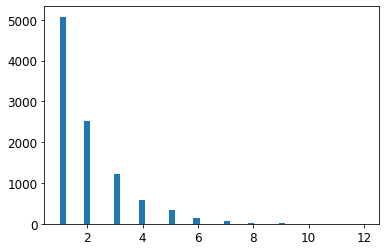

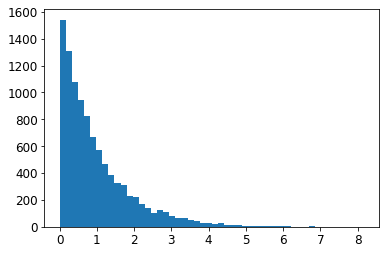

In [185]:
from scipy.stats import geom, expon
geom_distrib=geom(0.5).rvs(10000, random_state=42)
expon_distrib=expon(scale=1).rvs(10000, random_state=42)
plt.hist(geom_distrib, bins=50)
plt.show()
plt.hist(expon_distrib, bins=50)
plt.show()

# Exercise solutions

## 1.

Question: Try a Support Vector Machine regressor (`sklearn.svm.SVR`), with various hyperparameters such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Don't worry about what these hyperparameters mean for now. How does the best `SVR` predictor perform?

In [186]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=4)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  2.5min
d:\ProgramData\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 11.8min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 19.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=4,
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=2)

The best model achieves the following score (evaluated using 5-fold cross validation):

In [187]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

71302.4867777591

That's much worse than the `RandomForestRegressor`. Let's check the best hyperparameters found:

In [188]:
grid_search.best_params_

{'C': 300.0, 'kernel': 'linear'}

The linear kernel seems better than the RBF kernel. Notice that the value of `C` is the maximum tested value. When this happens you definitely want to launch the grid search again with higher values for `C` (removing the smallest values), because it is likely that higher values of `C` will be better.

## 2.

Question: Try replacing `GridSearchCV` with `RandomizedSearchCV`.

In [189]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=4, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  2.9min
d:\ProgramData\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 18.4min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 29.3min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=50, n_jobs=4,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027ACEAAB848>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027ACEAABE48>,
                                        'kernel': ['linear', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=2)

The best model achieves the following score (evaluated using 5-fold cross validation):

In [190]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

54311.25652850886

Now this is much closer to the performance of the `RandomForestRegressor` (but not quite there yet). Let's check the best hyperparameters found:

In [191]:
rnd_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

This time the search found a good set of hyperparameters for the RBF kernel. Randomized search tends to find better hyperparameters than grid search in the same amount of time.

Let's look at the exponential distribution we used, with `scale=1.0`. Note that some samples are much larger or smaller than 1.0, but when you look at the log of the distribution, you can see that most values are actually concentrated roughly in the range of exp(-2) to exp(+2), which is about 0.1 to 7.4.

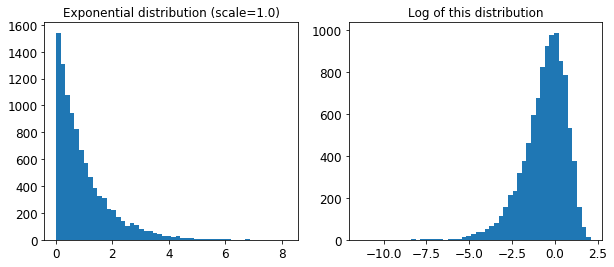

In [192]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

The distribution we used for `C` looks quite different: the scale of the samples is picked from a uniform distribution within a given range, which is why the right graph, which represents the log of the samples, looks roughly constant. This distribution is useful when you don't have a clue of what the target scale is:

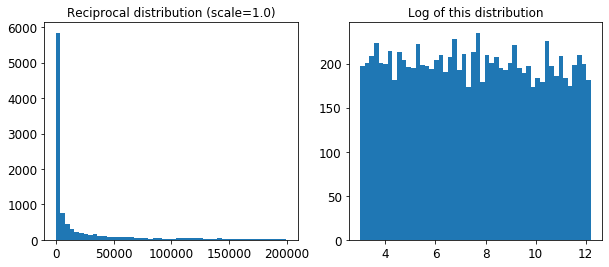

In [193]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

The reciprocal distribution is useful when you have no idea what the scale of the hyperparameter should be (indeed, as you can see on the figure on the right, all scales are equally likely, within the given range), whereas the exponential distribution is best when you know (more or less) what the scale of the hyperparameter should be.

## 3.

Question: Try adding a transformer in the preparation pipeline to select only the most important attributes.

In [194]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

Note: this feature selector assumes that you have already computed the feature importances somehow (for example using a `RandomForestRegressor`). You may be tempted to compute them directly in the `TopFeatureSelector`'s `fit()` method, however this would likely slow down grid/randomized search since the feature importances would have to be computed for every hyperparameter combination (unless you implement some sort of cache).

Let's define the number of top features we want to keep:

In [195]:
k = 5

Now let's look for the indices of the top k features:

In [196]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  7,  9, 10, 12], dtype=int64)

In [197]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'median_income', 'pop_per_hhold', 'bedrooms_per_room',
       'INLAND'], dtype='<U18')

Let's double check that these are indeed the top k features:

In [198]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.2860164708338849, 'median_income'),
 (0.13300472277657513, 'INLAND'),
 (0.10372462545575124, 'pop_per_hhold'),
 (0.0948288340533291, 'bedrooms_per_room'),
 (0.08330639506484906, 'longitude')]

Looking good... Now let's create a new pipeline that runs the previously defined preparation pipeline, and adds top k feature selection:

In [199]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [200]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

Let's look at the features of the first 3 instances:

In [201]:
housing_prepared_top_k_features[0:3]

array([[ 0.9023762 , -0.90638775, -0.14435056, -0.13910712,  0.        ],
       [ 0.89739533,  1.19254902,  0.0251516 , -0.9557053 ,  0.        ],
       [-1.27924739,  0.04074582, -0.06290695, -0.81099601,  0.        ]])

Now let's double check that these are indeed the top k features:

In [202]:
housing_prepared[0:3, top_k_feature_indices]

array([[ 0.9023762 , -0.90638775, -0.14435056, -0.13910712,  0.        ],
       [ 0.89739533,  1.19254902,  0.0251516 , -0.9557053 ,  0.        ],
       [-1.27924739,  0.04074582, -0.06290695, -0.81099601,  0.        ]])

Works great!  :)

## 4.

Question: Try creating a single pipeline that does the full data preparation plus the final prediction.

In [203]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [204]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(memory=None,
         steps=[('preparation',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                              

Let's try the full pipeline on a few instances:

In [205]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [170203.40437246 269431.71159244 233489.34136635  63223.99320272]
Labels:		 [55000.0, 266000.0, 219000.0, 87500.0]


Well, the full pipeline seems to work fine. Of course, the predictions are not fantastic: they would be better if we used the best `RandomForestRegressor` that we found earlier, rather than the best `SVR`.

## 5.

Question: Automatically explore some preparation options using `GridSearchCV`.

In [206]:
param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2, n_jobs=4)
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.9min
d:\ProgramData\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 12.8min
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed: 28.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preparation',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                     

In [207]:
grid_search_prep.best_params_

{'feature_selection__k': 15, 'preparation__num__imputer__strategy': 'mean'}

The best imputer strategy is `most_frequent` and apparently almost all features are useful (15 out of 16). The last one (`ISLAND`) seems to just add some noise.

Congratulations! You already know quite a lot about Machine Learning. :)